In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.patches import Ellipse
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from radio_beam import Beam
from astropy.io import fits
from astropy.wcs import WCS
from astropy.io import ascii
import numpy as np
import astropy.units as u
import matplotlib.colors as colors
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'

#---------- high res B6 (before conv) ------------
w51e_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

#---------- high res B3 (before conv) ------------

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'




#catalogdir = '/Users/dbahck37/w51data/alma_imf/catalog/getsf-native/'
catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'

class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]

       
        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]

def log_forward(arr):
    return np.log10(1000*arr+1)/np.log10(1001)
def log_backward(arr):
    return (1001**arr-1)/1000

def plot_grid_cutout(image, wcsNB, peakxy,major,minor,pa,figsize=20,vmin=0,vmax=1,issky=False,colorarr=None,norm=None):
     
   
    cen_world = wcsNB.wcs_pix2world(peakxy,0)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]    
        
    fig = plt.figure(figsize=(figsize,figsize))
    nsource = len(major)
    xplots = int(np.around(np.sqrt(nsource)))
    yplots = xplots
    gs1 = gs.GridSpec(yplots,xplots,wspace=0.0,hspace=0.0)
   

    if colors is None:
        colorarr = ['cyan' for x in range(nsource)]
    

    for i in range(nsource):
        
        ax = plt.subplot(gs1[i])
        positions = coordinates.SkyCoord(cen_world[i,0],cen_world[i,1], frame=wcs.utils.wcs_to_celestial_frame(wcsNB).name,unit=(u.deg,u.deg))
        cutout = Cutout2D(image, positions, 6.0*major[i], wcs=wcsNB, mode='partial')
        if norm=='sqrt':
            ax.imshow(cutout.data, origin='lower',cmap=plt.get_cmap('inferno'),
                      norm=colors.PowerNorm(gamma=0.5,vmin=vmin,vmax=vmax))
        elif norm=='log':
            ax.imshow(cutout.data, origin='lower',cmap=plt.get_cmap('inferno'),
                      norm=colors.FuncNorm(functions=(log_forward,log_backward),vmin=vmin,vmax=vmax))
        else:
            ax.imshow(cutout.data, origin='lower',cmap=plt.get_cmap('inferno'),vmin=vmin,vmax=vmax)
        
            
        ellipse = Ellipse([3*major[i],3*major[i]],width=major[i],height=minor[i],facecolor='none',angle=pa[i],edgecolor=colorarr[i],lw=2)
        ax.add_patch(ellipse)

        plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)   

        


### w51e b6

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(1920, 1920)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 25
 27 28 29 30 32]
32 15.497599821087581 13.63926648775462 41.16
34 20.509266487753248 18.2542664877537 134.3
35 38.27593315441635 27.82593315441845 104.8
36 19.132599821086856 16.31259982108742 71.54
37 17.877599821087106 14.605933154421093 68.97
38 16.61593315442069 14.382599821087807 48.17
39 19.64259982108675 17.42426648775387 77.76
40 14.990933154421016 12.335933154421548 14.46


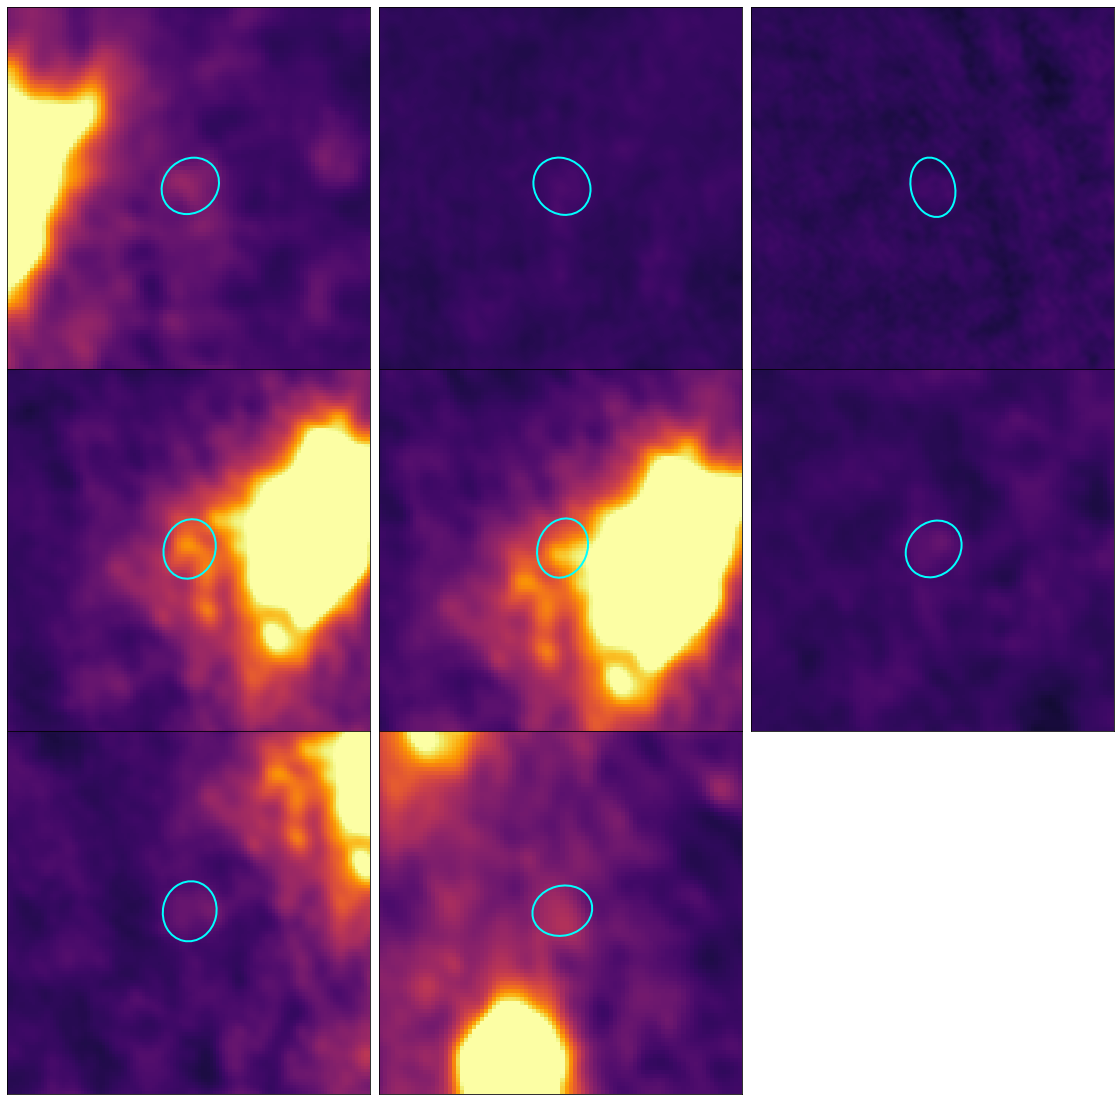

In [3]:

fitsdata_b6 = fits.open(w51e_b6_almaimf)
hdrNB6 = fits.getheader(w51e_b6_almaimf)  
wcsNB6 = WCS(hdrNB6,naxis=2)
scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]  
b6image = fitsdata_b6[0].data
if len(b6image.shape)!=2:
    b6image = fitsdata_b6[0].data[0][0]
print(b6image.shape)
cat = catdata(cat_w51e,band='B6')
skypos = np.vstack((cat.sky_ra,cat.sky_dec)).T
pixpos = wcsNB6.wcs_world2pix(skypos,0)

beamNB6 = Beam.from_fits_header(hdrNB6)

meanbeamsize = (beamNB6.major.value+beamNB6.minor.value)/4
major = (cat.afwhm/3600+meanbeamsize)/scaleNB6.value
minor = (cat.bfwhm/3600+meanbeamsize)/scaleNB6.value
pa = cat.theta
            
print(cat.rec_ind_b6)         
            
index = [32, 34, 35, 36, 37, 38, 39, 40]
index = [i-1 for i in index]
"""
index2 =[]
for i in range(len(index)):
    if len(np.where(ind == cat.rec_ind)[0])>0:
        index2.append(i)
colorarr = ['cyan' if x not in index2 'red' if x in index2 for x in range(nsource)]
"""
colorsarr = []
for i in range(len(index)):
    if len(np.where(index[i]==cat.rec_ind_b6)[0])>0:
        colorsarr.append('r')
    else:
        colorsarr.append('cyan')
pixpos_ind = pixpos[index]
major_ind = major[index]
minor_ind = minor[index]
pa_ind = pa[index]
for i in range(len(index)):
    print(cat.no[index][i],major_ind[i], minor_ind[i],pa_ind[i])
plot_grid_cutout(b6image, wcsNB6,pixpos_ind, major_ind,minor_ind,pa_ind,
                 vmin=-0.006853682920336723,vmax=0.03775018166358015,
                 colorarr=colorsarr)





Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(4800, 4800)
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 16 18 22 24 26 27 31 35]
['r', 'cyan', 'cyan', 'r', 'cyan', 'cyan', 'cyan', 'cyan']
32 20.805112712853553 19.354446046187356 0.3252
34 68.47711271283829 26.549112712851716 8.195
35 54.74377937950935 39.570446046180884 10.72
36 26.138446046185184 19.717112712853904 64.35
37 32.98377937951633 26.26377937951847 69.51
38 35.62377937951548 20.370446046187027 178.6
39 45.14377937951244 20.89844604618686 31.56
40 34.23711271284926 28.501112712851096 92.27


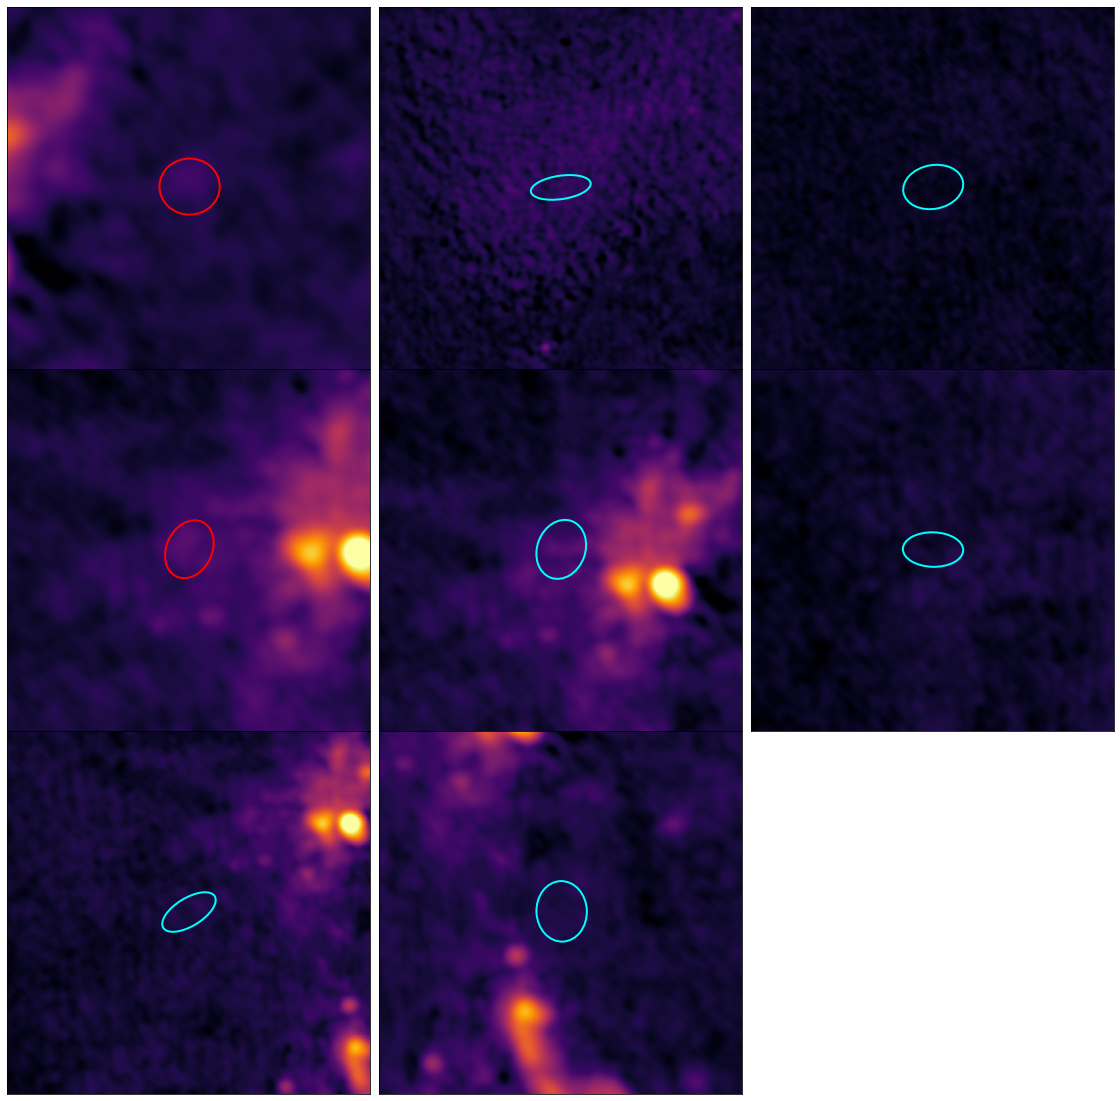

In [4]:

fitsdata_b6 = fits.open(w51e_b3_almaimf)
hdrNB6 = fits.getheader(w51e_b3_almaimf)  
wcsNB6 = WCS(hdrNB6,naxis=2)
scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]  
b6image = fitsdata_b6[0].data
if len(b6image.shape)!=2:
    b6image = fitsdata_b6[0].data[0][0]
print(b6image.shape)
cat = catdata(cat_w51e,band='B3')
skypos = np.vstack((cat.sky_ra,cat.sky_dec)).T
pixpos = wcsNB6.wcs_world2pix(skypos,0)

beamNB6 = Beam.from_fits_header(hdrNB6)

meanbeamsize = (beamNB6.major.value+beamNB6.minor.value)/4
major = (cat.afwhm/3600+meanbeamsize)/scaleNB6.value
minor = (cat.bfwhm/3600+meanbeamsize)/scaleNB6.value
pa = cat.theta
            
print(cat.rec_ind_b3)         
            
index = [32, 34, 35, 36, 37, 38, 39, 40]
index = [i-1 for i in index]
colorsarr=[]
for i in range(len(index)):
    if len(np.where(index[i]==cat.rec_ind_b3)[0])>0:
        colorsarr.append('r')
    else:
        colorsarr.append('cyan')
print(colorsarr)
pixpos_ind = pixpos[index]
major_ind = major[index]
minor_ind = minor[index]
pa_ind = pa[index]
for i in range(len(index)):
    print(cat.no[index][i],major_ind[i], minor_ind[i],pa_ind[i])
plot_grid_cutout(b6image, wcsNB6,pixpos_ind, major_ind,minor_ind,pa_ind,norm='log',
                 vmin=-0.0003,vmax=0.1295288363103794,colorarr=colorsarr)





Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(3840, 3840)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 20 28 29 31 35 55 57
 82]
['r', 'r', 'cyan', 'r', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'r', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'r', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan', 'cyan']
[0, 1, 3, 10, 16]


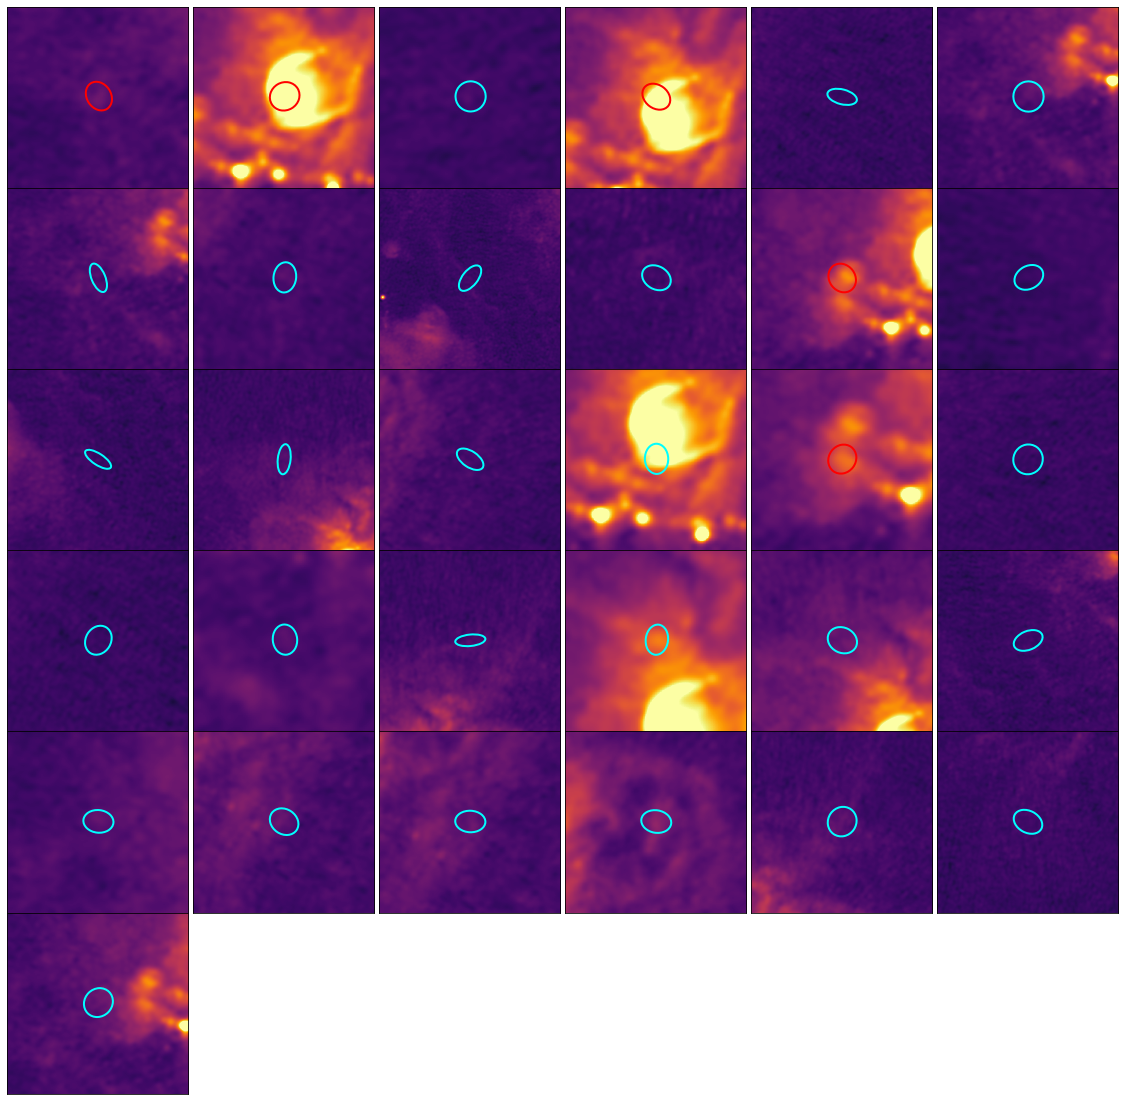

In [12]:

fitsdata_b6 = fits.open(w51n_b3_almaimf)
hdrNB6 = fits.getheader(w51n_b3_almaimf)  
wcsNB6 = WCS(hdrNB6,naxis=2)
scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]  
b6image = fitsdata_b6[0].data
if len(b6image.shape)!=2:
    b6image = fitsdata_b6[0].data[0][0]
print(b6image.shape)
cat = catdata(cat_w51n,band='B3')
skypos = np.vstack((cat.sky_ra,cat.sky_dec)).T
pixpos = wcsNB6.wcs_world2pix(skypos,0)

beamNB6 = Beam.from_fits_header(hdrNB6)

meanbeamsize = (beamNB6.major.value+beamNB6.minor.value)/4
major = (cat.afwhm/3600+meanbeamsize)/scaleNB6.value
minor = (cat.bfwhm/3600+meanbeamsize)/scaleNB6.value
pa = cat.theta
            
print(cat.rec_ind_b3)         
            
index = [11, 18, 24, 36, 37, 42, 45, 48, 50, 52, 56, 63, 65, 75, 77, 82, 83, 86, 91, 94, 102, 112, 113, 115, 118, 122, 123, 124, 125, 126, 127]
index = [i-1 for i in index]
colorsarr=[]
arr2=[]

for i in range(len(index)):
    if len(np.where(index[i]==cat.rec_ind_b3)[0])>0:
        colorsarr.append('r')
        arr2.append(i)
    else:
        colorsarr.append('cyan')
print(colorsarr)
print(arr2)
pixpos_ind = pixpos[index]
major_ind = major[index]
minor_ind = minor[index]
pa_ind = pa[index]
plot_grid_cutout(b6image, wcsNB6,pixpos_ind, major_ind,minor_ind,pa_ind,norm='sqrt',
                 vmin=-0.0006594449211326583,vmax=0.020289358264179793,colorarr=colorsarr)





Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(1120, 1120)
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 20 28 29 31 35 55 57
 82]
11 10.596161742567654 9.071161742567774 138.8 r
18 11.776161742567558 11.01116174256762 23.08 r
24 11.558161742567574 8.747161742567801 38.47 r
36 12.655161742567486 10.284161742567678 140.2 r
37 11.715161742567563 10.103161742567695 107.0 r
42 10.168161742567687 9.11316174256777 104.4 r
45 11.029161742567618 9.62816174256773 64.74 cyan
48 8.894161742567789 7.415161742567908 22.18 r
50 19.585161742566935 17.85516174256707 71.13 r
52 9.001161742567781 8.052161742567856 56.66 r
56 13.40516174256743 11.02116174256762 136.9 r
63 7.7631617425678785 7.0331617425679385 127.4 r
65 8.37816174256783 8.083161742567853 119.9 r
69 9.814161742567716 8.13116174256785 112.7 r
73 8.64216174256781 7.119161742567931 171.6 r
75 11.473161742567582 9.844161742567714 172.6 r
77 12.455161742567503 9.48516174256774 141.3 r
82 11.200161742567605 8.293161742567836 91.03 cyan
83 10.852161742567631 8.797161742567797 44.54 cy

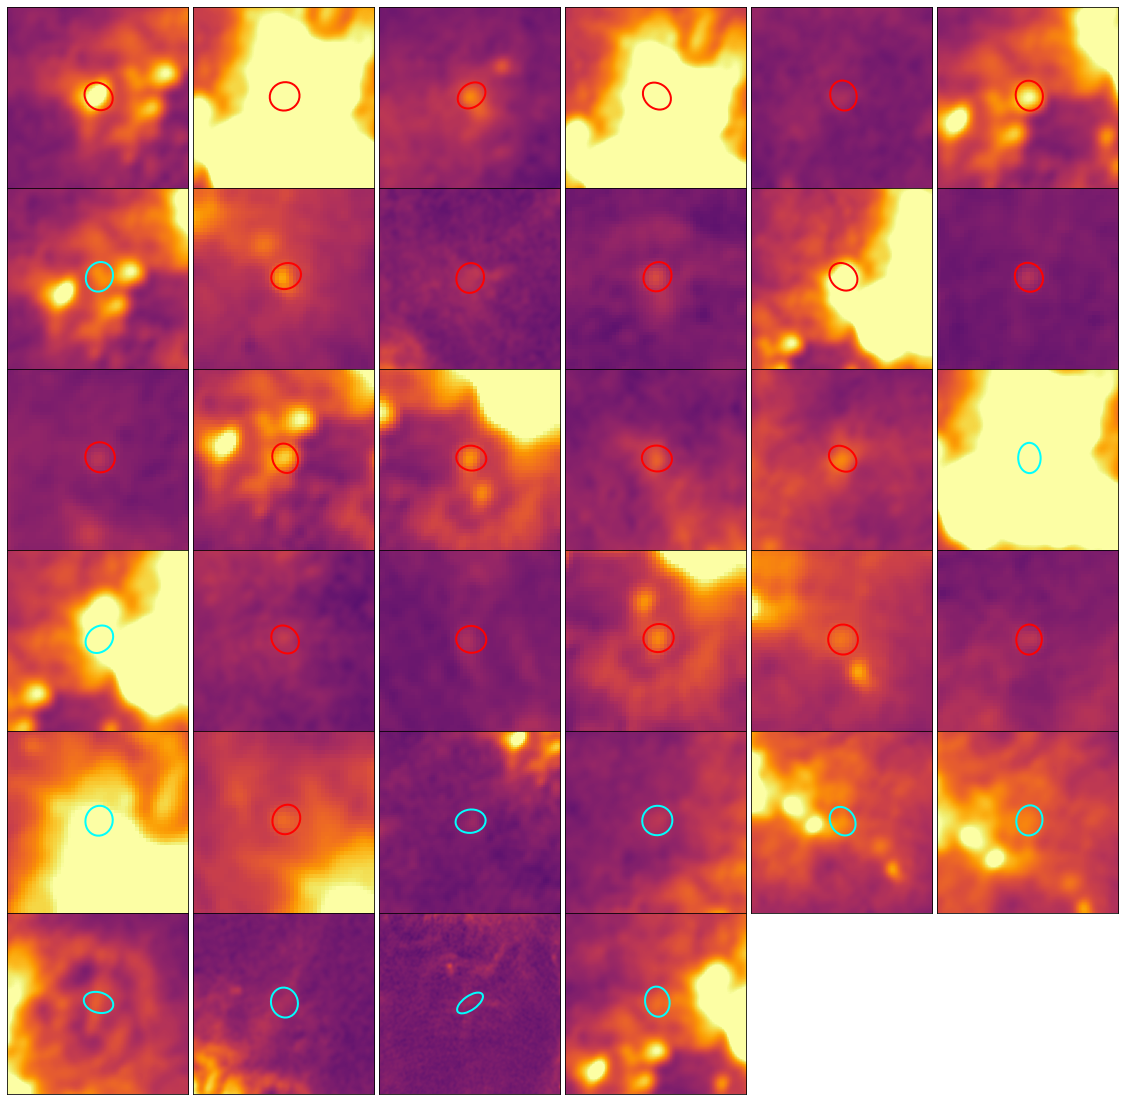

In [20]:

fitsdata_b6 = fits.open(w51n_b6_almaimf)
hdrNB6 = fits.getheader(w51n_b6_almaimf)  
wcsNB6 = WCS(hdrNB6,naxis=2)
scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]  
b6image = fitsdata_b6[0].data
if len(b6image.shape)!=2:
    b6image = fitsdata_b6[0].data[0][0]
print(b6image.shape)
cat = catdata(cat_w51n,band='B6')
skypos = np.vstack((cat.sky_ra,cat.sky_dec)).T
pixpos = wcsNB6.wcs_world2pix(skypos,0)

beamNB6 = Beam.from_fits_header(hdrNB6)

meanbeamsize = (beamNB6.major.value+beamNB6.minor.value)/4
major = (cat.afwhm/3600+meanbeamsize)/scaleNB6.value
minor = (cat.bfwhm/3600+meanbeamsize)/scaleNB6.value
pa = cat.theta
            
print(cat.rec_ind_b3)         
            
index = [11, 18, 24, 36, 37, 42, 45, 48, 50, 52, 56, 63, 65, 69, 73, 75, 77, 82, 83, 86, 91, 94, 101, 102, 112, 113, 115, 118, 122, 123, 124, 125, 126, 127]
index = [i-1 for i in index]
colorsarr=[]
arr2=[]
for i in range(len(index)):
    if len(np.where(index[i]==cat.rec_ind_b6)[0])>0:
        colorsarr.append('r')
        arr2.append(i)
    else:
        colorsarr.append('cyan')
pixpos_ind = pixpos[index]
major_ind = major[index]
minor_ind = minor[index]
pa_ind = pa[index]
for i in range(len(index)):
    print(cat.no[index][i],major_ind[i], minor_ind[i],pa_ind[i],colorsarr[i])
print(list(cat.no[index][arr2]))    
plot_grid_cutout(b6image, wcsNB6,pixpos_ind, major_ind,minor_ind,pa_ind,norm='sqrt',
                 vmin=-0.0021462059082253933,vmax=0.017530498398170127,colorarr=colorsarr)


